In [1]:
import numpy as np 
import pandas as pd 
import pickle


# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys
sys.path.append('..')

from utils.viz import viz 
from utils.model import *  
from utils.fig_fn import *
viz.get_style()

In [2]:
exp = 'exp1'
agents = ['rmPG', 'caPG', 'ecPG']
method = 'mle'
dpi = 300

### Fig. 2A model comparison

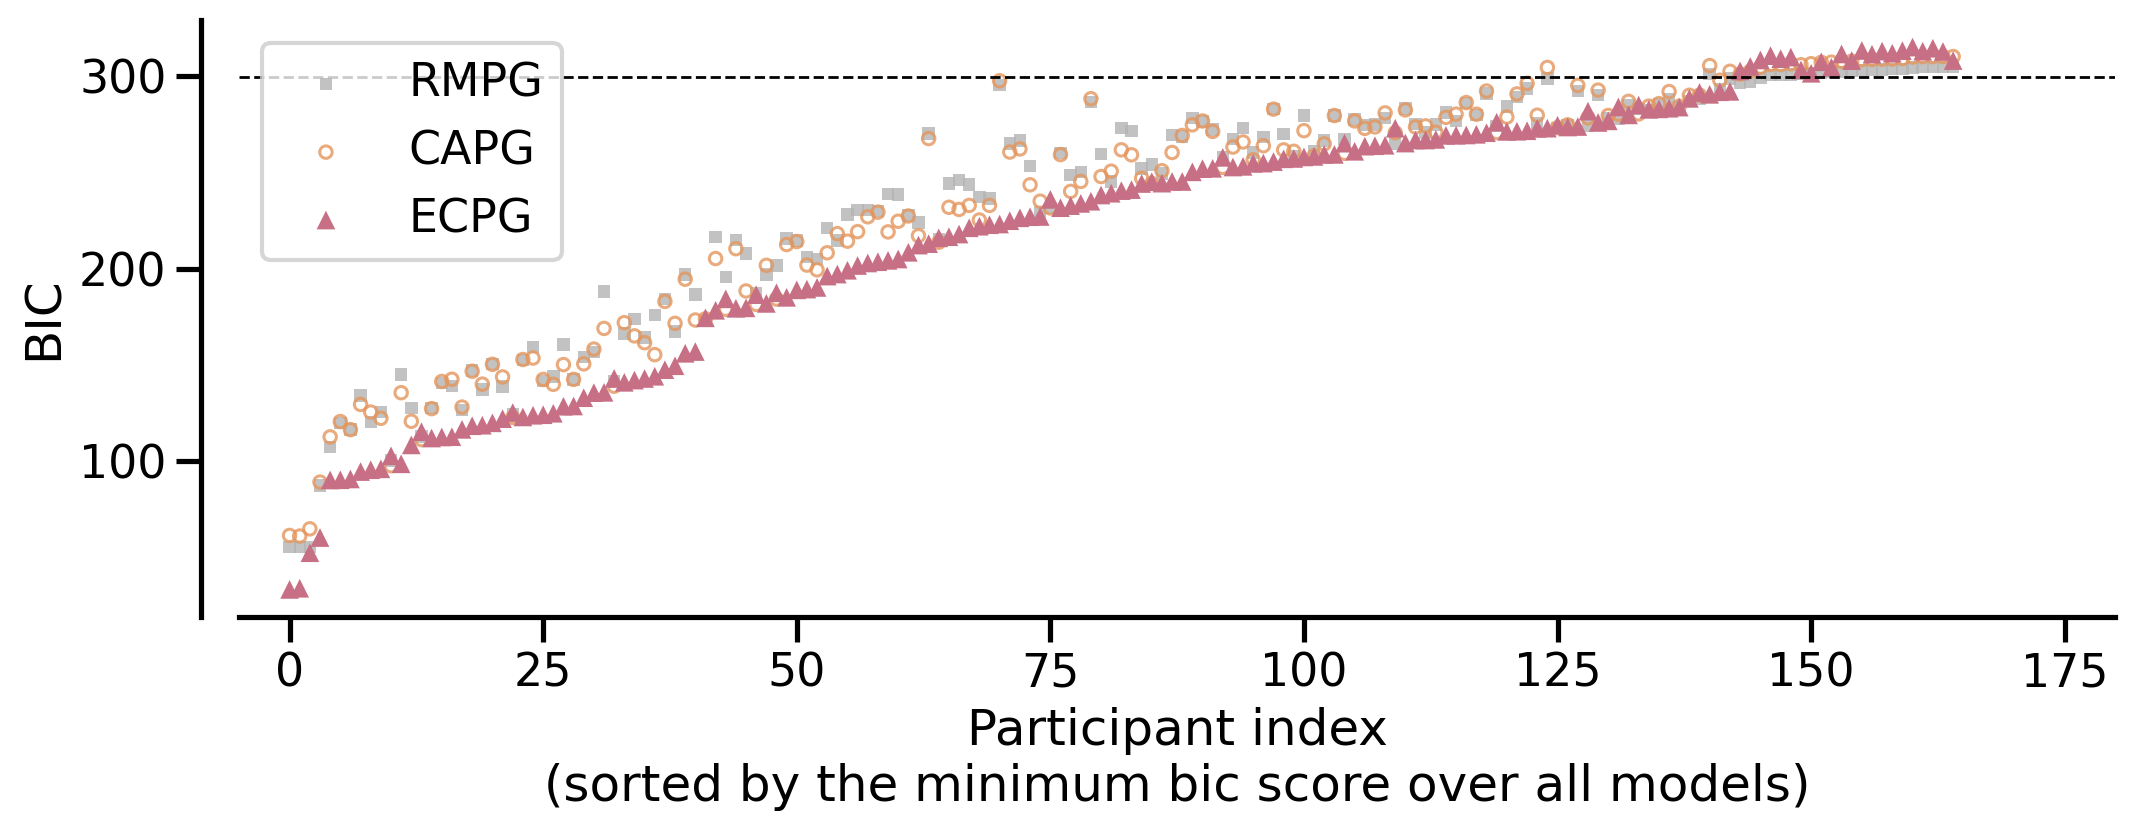

In [3]:
crs_table = get_crs(exp=exp, agents=agents)
viz_model_cmp(crs_table, exp=exp, agents=agents, crs='bic')
plt.savefig('../figures/exp1/fIg2A_modelcomp.pdf', dpi=dpi)

trained:
           n         r           CI95%         p-val       BF10  power
pearson  165 -0.956267  [-0.97, -0.94]  6.188014e-89  9.008e+84    1.0
untrained:
           n         r           CI95%         p-val       BF10  power
pearson  165 -0.515745  [-0.62, -0.39]  1.350050e-12  6.352e+09    1.0


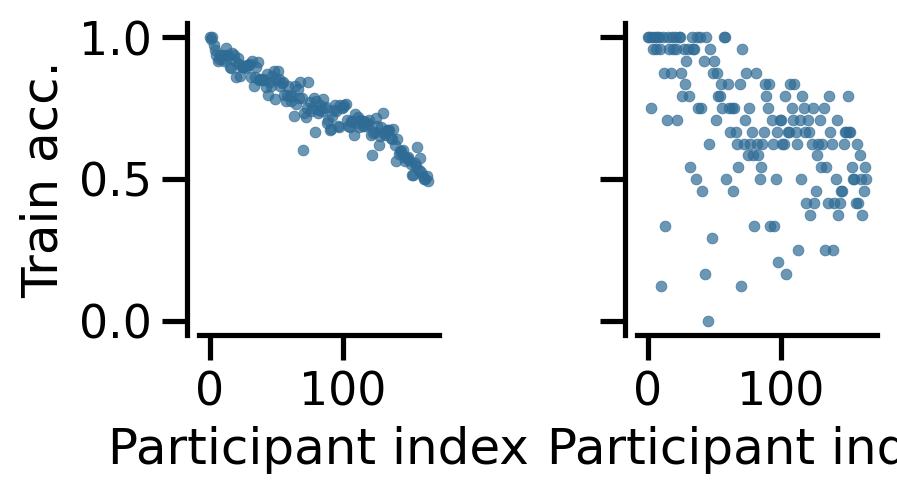

In [4]:
viz_corr(crs_table, exp=exp, agents=agents, crs='bic')
plt.savefig(f'../figures/{exp}/Fig2A2_corr.pdf', dpi=dpi)

In [5]:
m = 'ecPG'
fname = f'../fits/{exp}/fit_sub_info-{m}-{method}.pkl'
with open(fname, 'rb')as handle: fit_sub_info = pickle.load(handle)
sub_lst = list(fit_sub_info.keys())
if 'group' in sub_lst: sub_lst.pop(sub_lst.index('group'))
param_lst = [fit_sub_info[sub_id]['param'] for sub_id in sub_lst]
tmp = np.vstack(param_lst)
p_trans = eval(m).p_trans
param_lst = [fn(tmp[:, i]) for i, fn in enumerate(p_trans)]
param_lst = np.vstack(param_lst).T
p_name = fit_sub_info[sub_lst[0]]['param_name']
p_name = p_name[:-1] if m=='LC' else p_name  
pdata = pd.DataFrame(param_lst, columns=p_name)

In [6]:
import pingouin as pg 
pg.ttest(pdata['λ'], 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.493459,164,two-sided,0.000613,"[1.48, 5.32]",0.271965,28.384,0.934856


### Fig. 2B PXP

[0. 0. 1.]


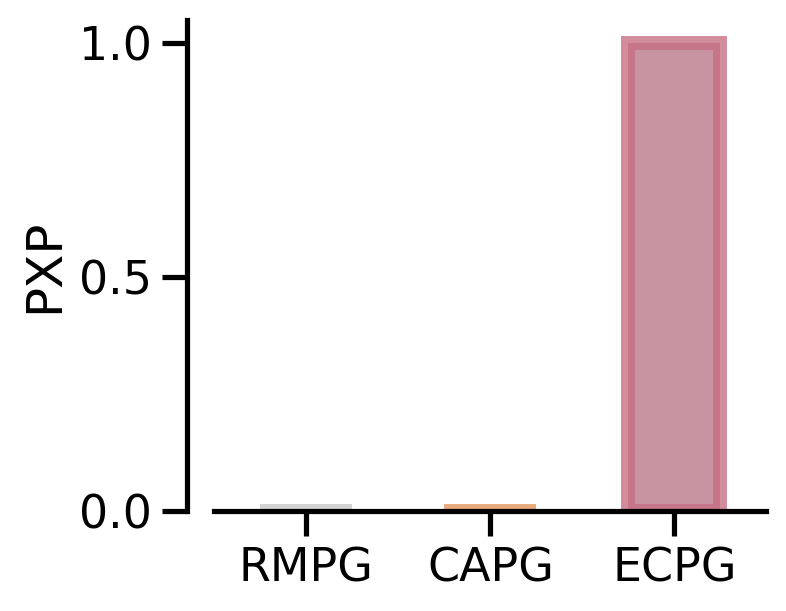

In [7]:
viz_pxp(exp, agents, method=method)
plt.savefig(f'../figures/{exp}/Fig2B_pxp.pdf', dpi=dpi)

### Fig. 2C representation complexity reduction

In [8]:
def viz_reduct(comb_data, agents):
    palette = [eval(agent).color for agent in agents]
    fig, ax = plt.subplots(1, 1, figsize=(3.2, 2.4), 
                            sharex=True, sharey=True)
    v = sns.violinplot(x='model', y='iSZ_reduct', data=comb_data, 
            palette=palette, hue='agent', hue_order=agents, 
            legend=False, alpha=.1, inner=None, scale='width',
            ax=ax)
    plt.setp(v.collections, alpha=.35, edgecolor='none')
    s = sns.stripplot(x='model', y='iSZ_reduct', data=comb_data, 
            palette=palette, hue='agent', hue_order=agents, 
            edgecolor='gray', dodge=True, jitter=True, alpha=.7,
            legend=False, zorder=2,
            ax=ax)
    b = sns.barplot(x='model', y='iSZ_reduct', data=comb_data, 
            hue='agent', hue_order=agents, 
            errorbar='se', linewidth=1, 
            edgecolor=(0,0,0,0), facecolor=(0,0,0,0),
            capsize=.1, errwidth=2.5, errcolor=[.2, .2, .2],
            ax=ax)
    ax.legend().remove()
    ax.axhline(y=0, xmin=0, xmax=1, lw=1, 
        color=[.2, .2, .2], ls='--')
    ax.set_ylim([-.7, .3])
    ax.spines['left'].set_position(('axes',-0.05))
    ax.set_xlabel('')
    ax.set_xticks([-.25, 0, .25])
    ax.set_xticklabels([None, None, None])
    ax.set_ylabel('bits reduce')
    ax.set_box_aspect(1.4)
    fig.tight_layout()

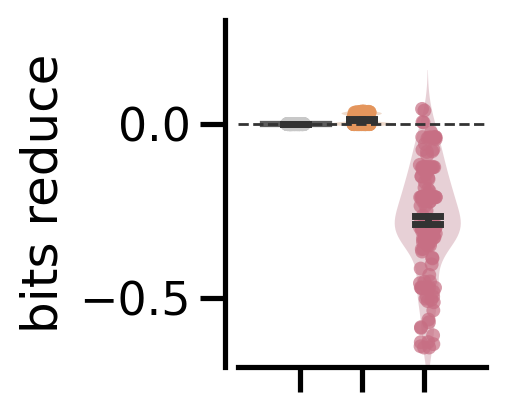

In [9]:
comb_data = iSZ_reduct(exp, agents=agents, method=method)
viz_reduct(comb_data, agents=agents)
plt.savefig(f'../figures/{exp}/Fig2C_reduct.pdf', dpi=dpi)

### Fig. 2D Generalization

In [10]:
def viz_transfer(exp, agents, method='mle'):
    data = []
    for agent in agents:
        df = pd.read_csv(f'{pth}/../analyses/{exp}/{agent}/{method}-base.csv')
        df['agent'] = agent
        data.append(df)
    data = pd.concat(data, axis=0)
    # rename the agent for figures
    fig, ax = plt.subplots(1, 1, figsize=(6.5, 5))
    transfer(ax, data, agents)
    ax.set_yticks([0, .25, .5, .75, 1])
    ax.set_yticklabels([0, None, .5, None, 1])
    fig.tight_layout()

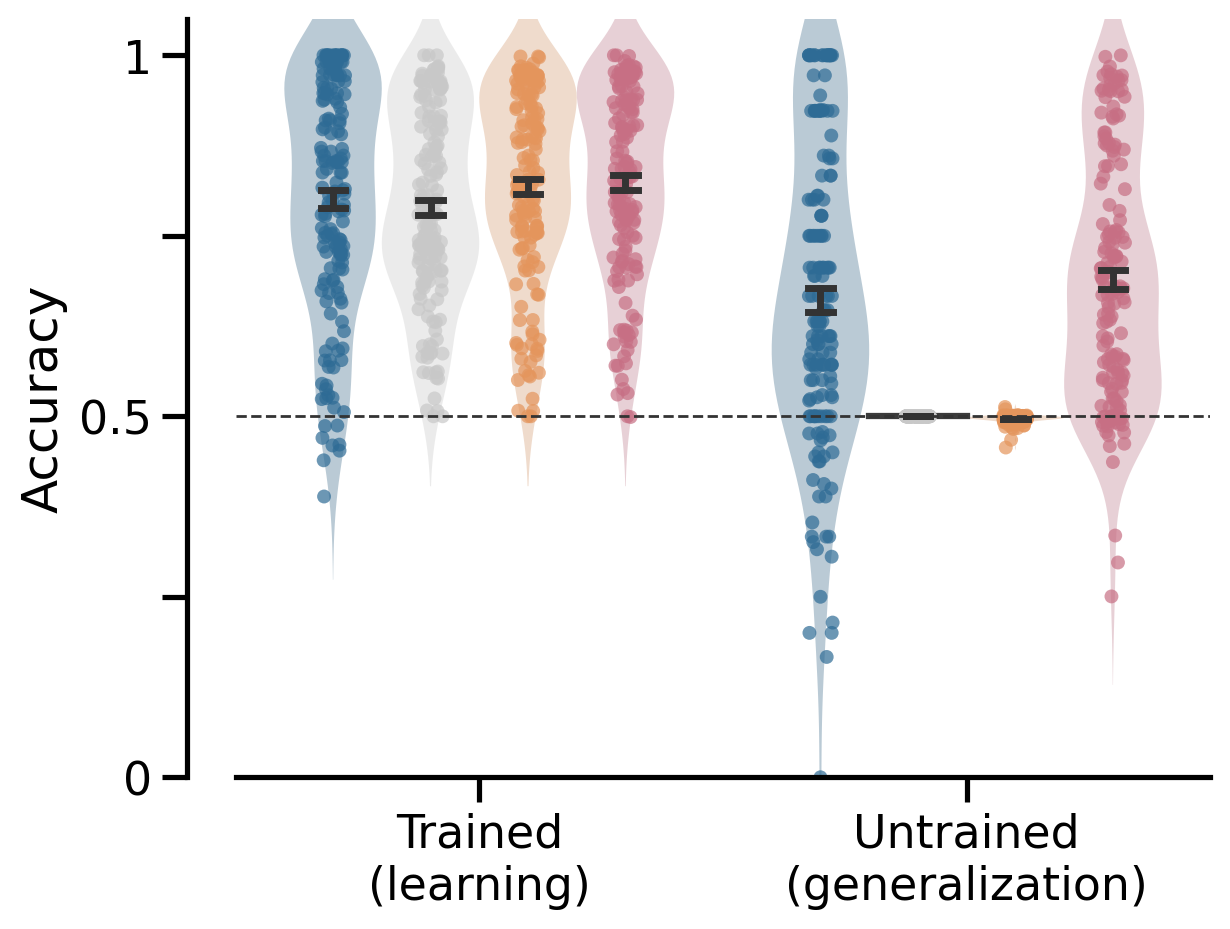

In [11]:
viz_transfer(exp, agents=['human']+agents, method=method)
plt.savefig(f'../figures/{exp}/Fig2D_transfer.pdf', dpi=dpi)

### Fig. 2E Learning 

In [12]:
def viz_lc(exp, agents, method='mle'):
    n = len(agents)
    fig, axs = plt.subplots(n, 1, figsize=(4, n*1.8), sharex=True)
    for i, agent in enumerate(agents):
        ax = axs[i] if n>1 else axs
        lc(ax, exp, ['human', agent], method)
        ax.set_yticks([.5, .75, 1])
        ax.set_yticklabels([.5, None, 1])
    fig.tight_layout()

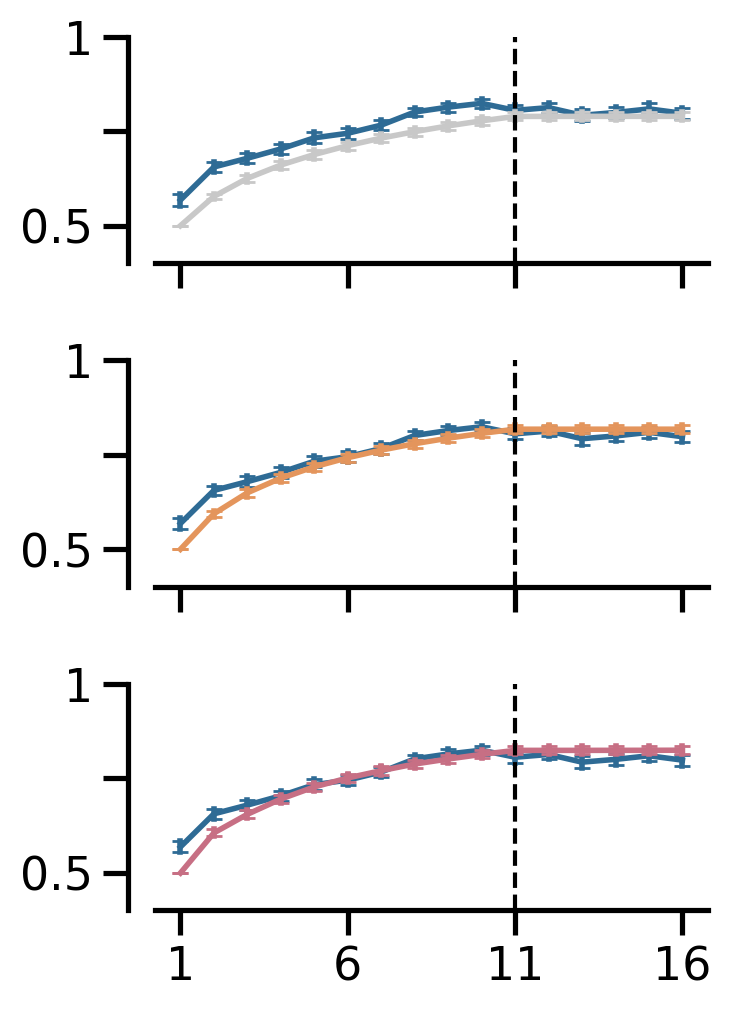

In [13]:
viz_lc(exp, agents=agents, method=method)    
plt.savefig(f'../figures/{exp}/Fig2E_lc.pdf', dpi=dpi)
    